In [1]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
%matplotlib inline

In [2]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))


In [3]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SBX_SECRET_KEY = os.getenv('PLAID_SBX_SECRET_KEY')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to plaid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [4]:
INSTITUTION_ID = "ins_109508"

In [5]:
api_key = 'tjhwakjgfhkasjdhfsajdflsj$$$'

api_request = 'https://www.plaid.com/api/'

### 2. Generate a public token

In [6]:
# YOUR CODE HERE
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SBX_SECRET_KEY, public_key=PLAID_PUBLIC_KEY, environment='sandbox')
create_public_token = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions', 'income', 'assets'])

### 3. Exchange the public token for an access token

In [7]:
# YOUR CODE HERE
exchange_reponse = client.Item.public_token.exchange(create_public_token['public_token'])

### 4. Fetch Accounts

In [8]:
# YOUR CODE HERE
access_token = exchange_reponse['access_token']

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [9]:
# YOUR CODE HERE
end_date = datetime.datetime.now()
start_date = end_date + datetime.timedelta(-90)

In [10]:
start_date = start_date.strftime('%Y-%m-%d')

In [11]:
end_date = end_date.strftime('%Y-%m-%d')

In [12]:
print(start_date, end_date)

2019-10-30 2020-01-28


### 2. Print the categories for each transaction

In [13]:
# YOUR CODE HERE
transaction_response = client.Transactions.get(access_token, start_date, end_date)

In [16]:
transactions = transaction_response['transactions']

### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [17]:
# YOUR CODE HERE
transactions_df = pd.DataFrame(columns=['Date', 'Name', 'Amount', 'Category'])

In [18]:
date =[]
name = []
amount = []
category = []
for index in transactions:
    date.append(index['date'])
    name.append(index['name'])
    amount.append(index['amount'])
    category.append(index['category'])

In [19]:
category_b = []
for index in category: 
    category_b.append(index[0])

In [20]:
transactions_df['Date'] = date
transactions_df['Name'] = name
transactions_df['Amount'] = amount
transactions_df['Category'] = category_b

In [21]:
transactions_df.shape

(48, 4)

In [22]:
transactions_df.count()

Date        48
Name        48
Amount      48
Category    48
dtype: int64

In [23]:
transactions_df.isnull().sum()

Date        0
Name        0
Amount      0
Category    0
dtype: int64

In [24]:
transactions_df.dtypes

Date         object
Name         object
Amount      float64
Category     object
dtype: object

### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [25]:
# YOUR CODE HERE
transactions_df['Date'] = pd.to_datetime(transactions_df['Date'])

In [26]:
transactions_df.head()

,Date,Name,Amount,Category
0,2020-01-26,Tectra Inc,500.0,Food and Drink
1,2020-01-25,AUTOMATIC PAYMENT - THANK,2078.5,Payment
2,2020-01-25,KFC,500.0,Food and Drink
3,2020-01-25,Madison Bicycle Shop,500.0,Shops
4,2020-01-16,CREDIT CARD 3333 PAYMENT *//,25.0,Payment


In [27]:
transactions_df.dtypes

Date        datetime64[ns]
Name                object
Amount             float64
Category            object
dtype: object

In [28]:
transactions_df.set_index('Date', inplace = True)

In [29]:
transactions_df.sort_index(inplace  = True)

In [30]:
transactions_df.head()

,Name,Amount,Category
Date,,,
2019-10-31,Uber,6.33,Travel
2019-11-02,United Airlines,500.00,Travel
2019-11-12,INTRST PYMNT,-4.22,Transfer
2019-11-13,SparkFun,89.40,Food and Drink
2019-11-14,Starbucks,4.33,Food and Drink


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [ ]:
#df = transactions_df.groupby([transactions_df.index.year])

In [32]:
previous_year_gi = transactions_df.loc['2019-10-31':'2019-12-30', 'Amount'].sum()

In [33]:
print(f"The previous year's gross income was ${previous_year_gi}")

The previous year's gross income was $21296.81


In [34]:
current_monthly_in = transactions_df.loc[:,'Amount'].mean()

In [35]:
print(f"The current monthly income is ${round(current_monthly_in,2)}")

The current monthly income is $665.33


In [36]:
print(f"The Projected yearly income is ${round(current_monthly_in*12,2)}")

The Projected yearly income is $7983.93


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calculate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

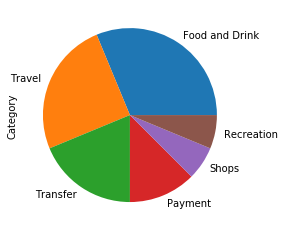

In [37]:
# YOUR CODE HERE
transactions_df['Category'].value_counts().plot.pie()

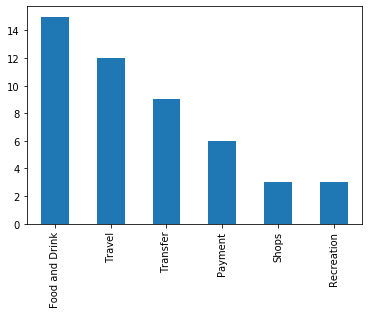

In [38]:
transactions_df['Category'].value_counts().plot.bar()

### Calculate the expenses per month

In [39]:
# YOUR CODE HERE
monthly_expenses = transactions_df.loc[transactions_df['Amount'] < 0]
monthly_expenses

,Name,Amount,Category
Date,,,
2019-11-12,INTRST PYMNT,-4.22,Transfer
2019-11-15,United Airlines,-500.00,Travel
2019-12-12,INTRST PYMNT,-4.22,Transfer
2019-12-15,United Airlines,-500.00,Travel
2020-01-11,INTRST PYMNT,-4.22,Transfer
2020-01-14,United Airlines,-500.00,Travel


In [40]:
expenses = monthly_expenses['Amount'].abs()

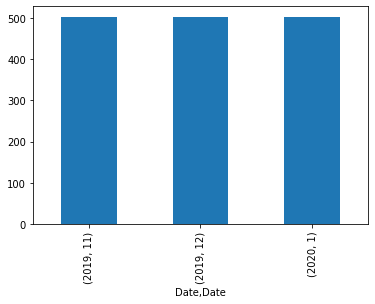

In [41]:
expenses.groupby([expenses.index.year, expenses.index.month]).sum().plot.bar()